In [1]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [2]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)

In [3]:
y = x.pow(2) + torch.rand(x.size()) * 0.2

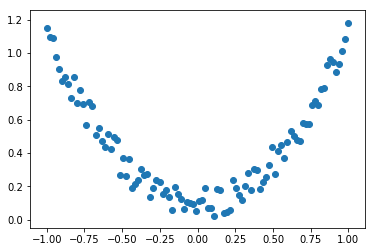

In [4]:
plt.scatter(x, y)
plt.show()

In [5]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super().__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [6]:
net = Net(1, 10, 1)

In [7]:
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [8]:
plt.ion()
plt.show()

In [9]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
loss_fun = torch.nn.MSELoss()

0.008112043


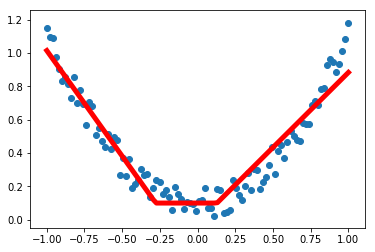

0.0069208317


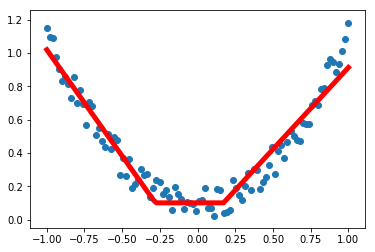

0.0062129577


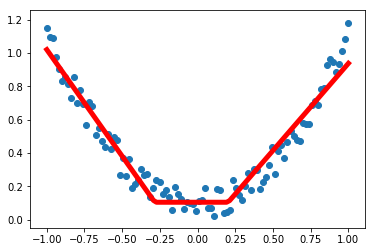

0.00583211


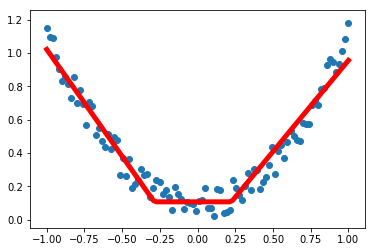

0.0055581215


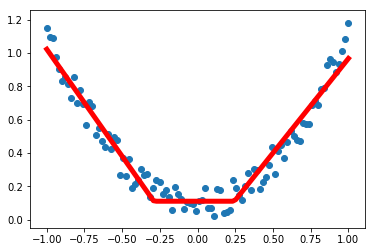

0.0053170873


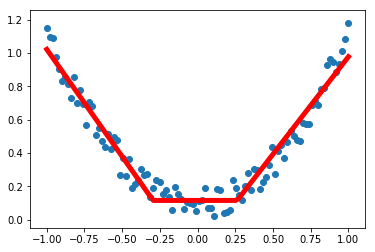

0.005131885


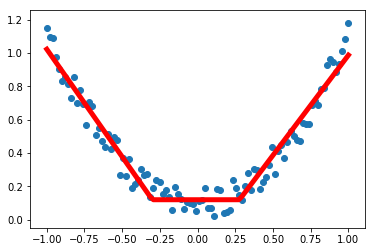

0.005006407


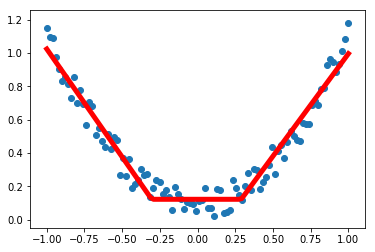

0.0049287863


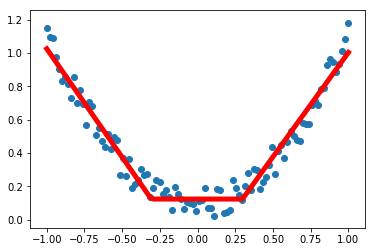

0.004880067


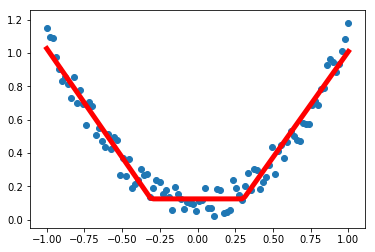

In [11]:
for t in range(100):
    prediction = net(x)
    loss = loss_fun(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t % 10 == 0:
        plt.cla()
        plt.scatter(x, y)
        plt.plot(x.data.numpy(), prediction.data.numpy(), "r-", lw=5)
        print(loss.data.numpy())
        plt.pause(0.1)
plt.ioff()
plt.show()
    